In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import math
from vyper.utils import SizeLimits
from gmpy2 import mpz

# plotting:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# for handling SettingWithCopyWarning
from pandas.core.common import SettingWithCopyWarning
import warnings

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
data = pd.read_csv("../../data/cbrt_analysis.csv")
data["input"] = data["input"].apply(lambda x: mpz(x))
data["cbrt_ideal"] = data["cbrt_ideal"].apply(lambda x: mpz(x))
data["cbrt_implementation"] = data["cbrt_implementation"].apply(lambda x: mpz(x))
data["diff_ideal_impl"] = data["cbrt_ideal"] - data["cbrt_implementation"]

data

,input,cbrt_ideal,cbrt_implementation,diff_ideal_impl
0,68719476736,4096000000,4096000000,0
1,2596148429267413814265248164610048,137438953472000000,137438953472000000,0
2,6538604850853222684962018644524908653815365908...,40286700270254487913069696701293,40640628135015176962559429,40286659629626352897892734141864
3,1022164346626138398113684925928324759512882752...,46756311449278153087399761732793,34889723080908352445207496,46756276559555072179047316525297
4,11417981541647679048466287755595961091061972992,2251799813685248000000,2251799813685248000000,0
...,...,...,...,...
9995,4527170854499910954467154581247674632841427025...,35640377466775291638490404318034,47177418764427101283756267,35640330289356527211389120561767
9996,9977957957040200014706100254495001167784408519...,46381759881645671598986595817095,35698435637234686292759592,46381724183210034364300303057503
9997,324170401943413033731991321230428581100609,68694893278212850310,68694893278212850310,0
9998,181155048988241200112654527457792015805096,56582675734842801655,56582675734842801655,0


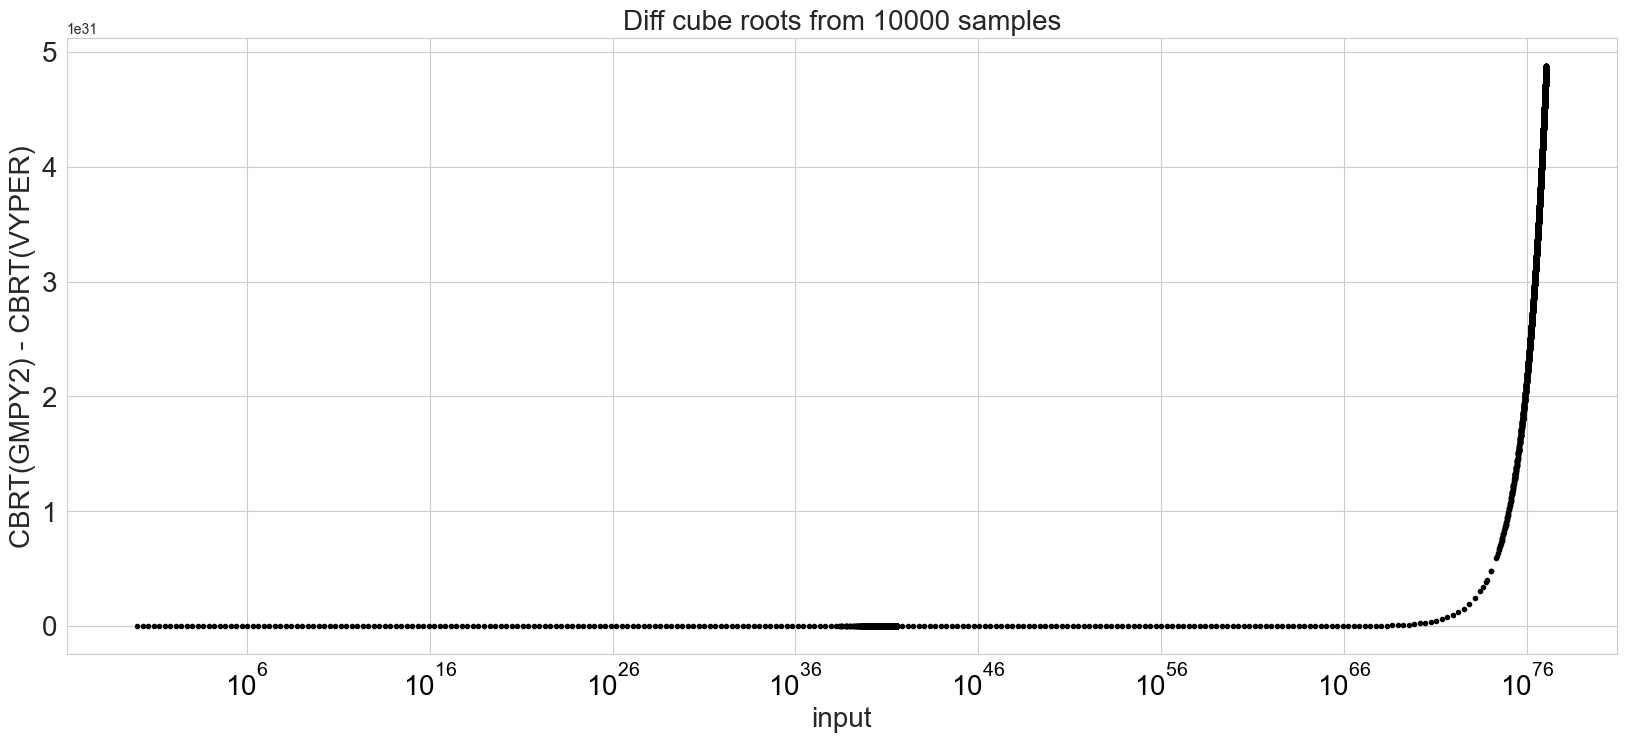

In [3]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.plot(
    data.input,
    data.diff_ideal_impl,
    '.',
    color="black",
)


ax.set_xlabel("input", fontsize=20)
ax.set_ylabel("CBRT(GMPY2) - CBRT(VYPER)", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black');
ax.set_xscale("log")
ax.set_title(f"Diff cube roots from {data.shape[0]} samples", fontsize=20);

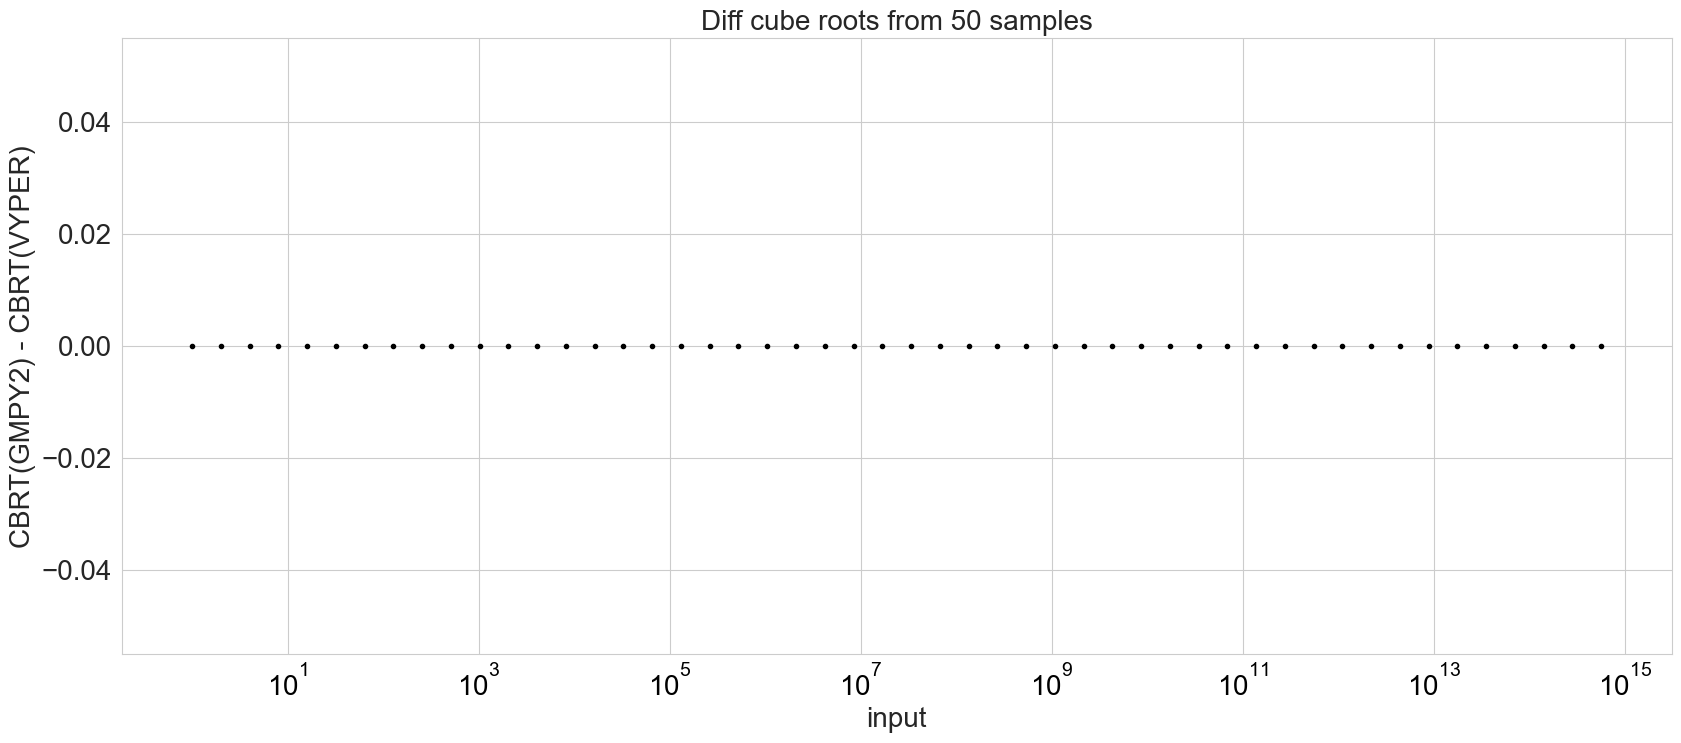

In [4]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

to_plot = data[(data.input < 10**15)]

ax.plot(
    to_plot.input,
    to_plot.diff_ideal_impl,
    '.',
    color="black",
)


ax.set_xlabel("input", fontsize=20)
ax.set_ylabel("CBRT(GMPY2) - CBRT(VYPER)", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black');
ax.set_xscale("log")
ax.set_title(f"Diff cube roots from {to_plot.shape[0]} samples", fontsize=20);

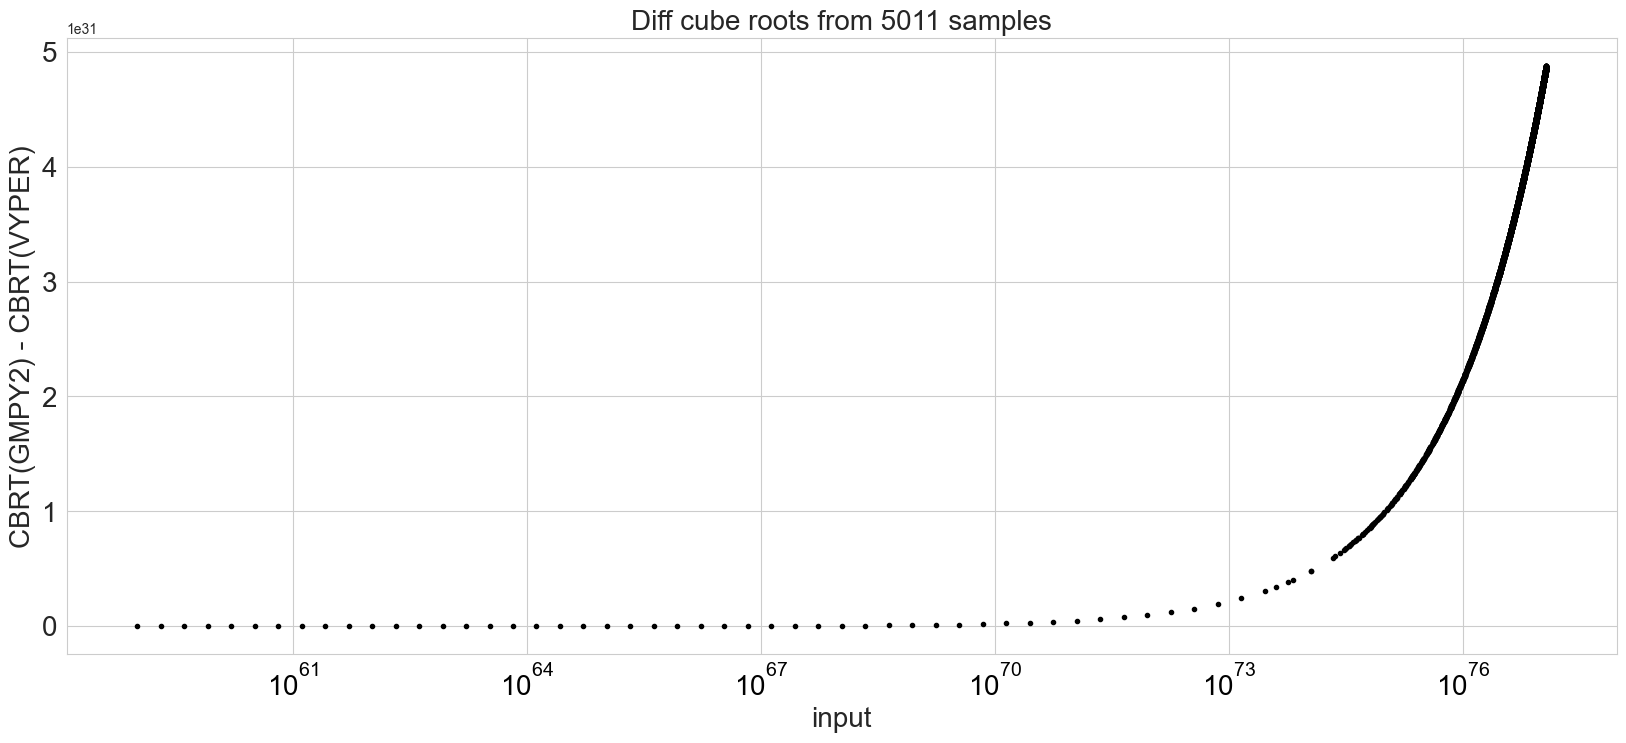

In [5]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

to_plot = data[(data.input > 10**59)]

ax.plot(
    to_plot.input,
    to_plot.diff_ideal_impl,
    '.',
    color="black",
)


ax.set_xlabel("input", fontsize=20)
ax.set_ylabel("CBRT(GMPY2) - CBRT(VYPER)", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black');
ax.set_xscale("log")
ax.set_title(f"Diff cube roots from {to_plot.shape[0]} samples", fontsize=20);

In [6]:
exact_data = data[(data.diff_ideal_impl == 0)]
exact_data.input.astype(float).describe()

count    4.229000e+03
mean     6.785420e+54
std      3.891395e+56
min      1.000000e+00
25%      1.181764e+41
50%      1.924714e+41
75%      2.638954e+41
max      2.510841e+58
Name: input, dtype: float64

In [7]:
not_exact_data = data[(data.diff_ideal_impl != 0)]
not_exact_data.input.astype(float).describe()

count    5.771000e+03
mean     5.016131e+76
std      3.679920e+76
min      1.475740e+20
25%      1.561503e+76
50%      4.904877e+76
75%      8.257235e+76
max      1.157526e+77
Name: input, dtype: float64

# Gas Profile

In [8]:
gas_data = pd.read_csv("../../data/cbrt_profile.csv")
gas_data["input"] = gas_data["input"].apply(lambda x: mpz(x))
gas_data["cbrt_ideal"] = gas_data["cbrt_ideal"].apply(lambda x: mpz(x))
gas_data["cbrt_implementation"] = gas_data["cbrt_implementation"].apply(lambda x: mpz(x))

gas_data

,input,cbrt_ideal,cbrt_implementation,gasused
0,1780496213104945784139658046758688190158564727...,12120308796972037544490319591598,48640143606219968191999201,1899
1,2332839834938553359747887139778102291654771855...,13262588884988655624489961875952,19790554925894281091832510,1899
2,9852553886702349525533001550954098909949337129...,46186629762814947200010293338457,44858247581724966333203818,1899
3,87218707801438926215242296410915449400231,44347575594093367860,44347575594100604903,1827
4,116459764593309540309234266447643215626474,48834337758564429098,48834337758564429098,1845
...,...,...,...,...
9995,1068981905809123789634950196765533569130385170...,47459532008254020393564648499311,48391831793263590252779404,1899
9996,1047800598801646840042221871354452555606788919...,47143976771212312878426510357990,43728251774982021413738794,1899
9997,252497435610625633767247302375843795189952,63205129271336041567,63205129271336041567,1827
9998,154257589433993470010486730193961085205469,53630952901622175994,53630952901622175994,1845


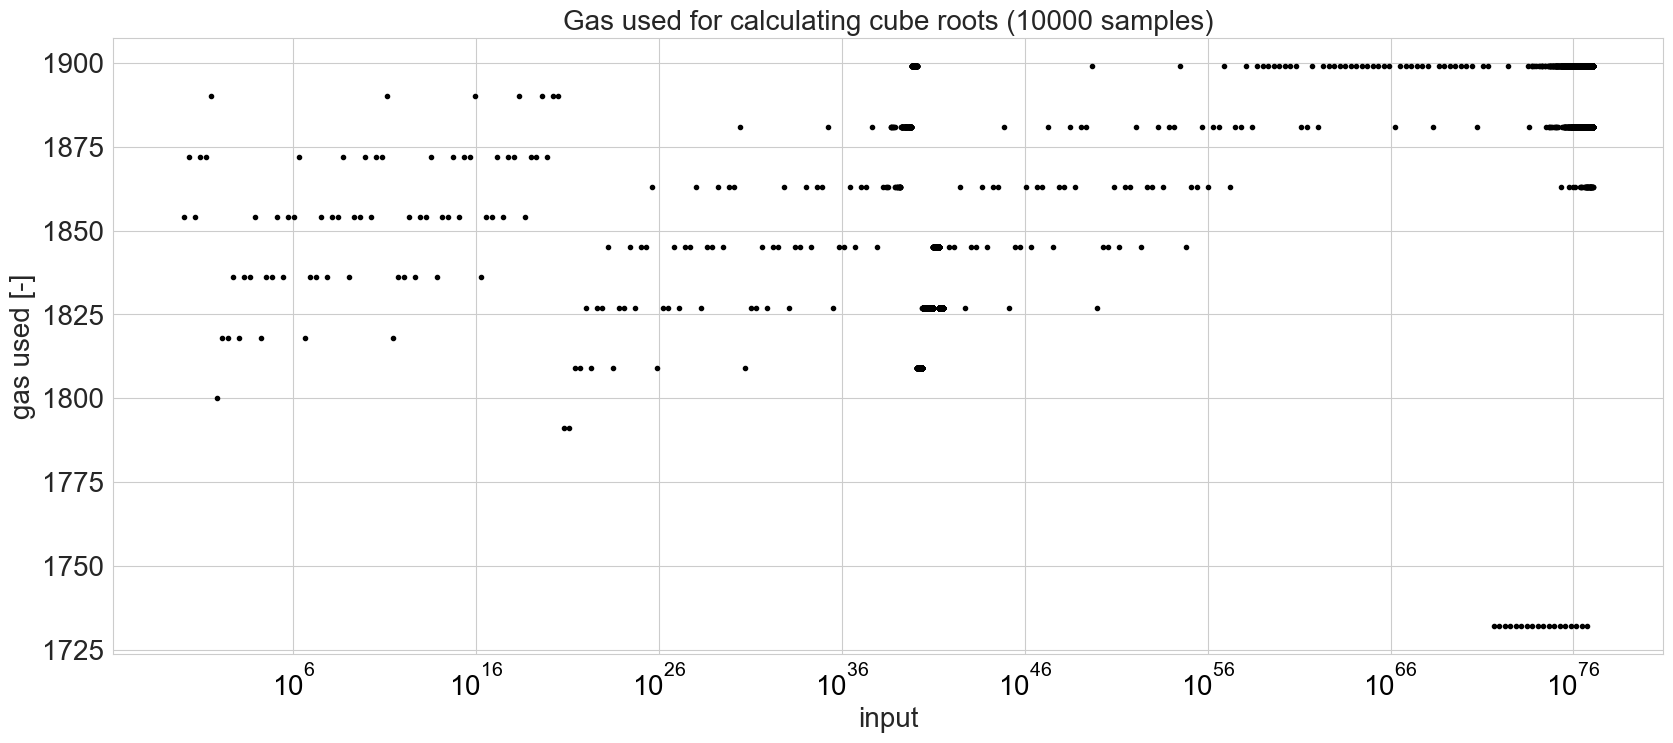

In [9]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.plot(
    gas_data.input,
    gas_data.gasused,
    '.',
    color="black",
)


ax.set_xlabel("input", fontsize=20)
ax.set_ylabel("gas used [-]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black');
ax.set_xscale("log")
ax.set_title(f"Gas used for calculating cube roots ({gas_data.shape[0]} samples)", fontsize=20);